### Lecture Notes 13th Feb

Today will be about recursion. After this class we will be able to start on PA2

In [2]:
function recursive_factorial(n)
    if n == 0
        return 1
    else
        return n*recursive_factorial(n-1)
    end
end 
#recursion is function that calls themself, we need to be careful 
#if we are creating a infinite loop. We must have a reasonable terminating
#criterion



recursive_factorial (generic function with 1 method)

In [13]:
n1 = 0
n2 = 0
x = rand(10000000)
for i in 1:10000000
    if x[i] <2/5
        n1+=1
    else
        n2+=1
    end
end
n1/n2

0.6669225392764456

In [2]:
using Random
[i^j for i in 0:4, j in 1:4]
f(x) = max(0,x)
D = [f.(-rand(5)),f.(1:0.5:3)]
D

2-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0]
 [1.0, 1.5, 2.0, 2.5, 3.0]

#### Midterm Review

##### 1) Vectorization

In [4]:
x = [ x^2 for x = 1:5 ]    #The default data type Vector{Int64} == Array{Int64,1}

5-element Vector{Int64}:
  1
  4
  9
 16
 25

In [21]:
A = [ x+2y for x = 1:3, y = 1:5 ] # 3x5 matrix with entries A_ij = i + j. Matrix{Int64} == Array{INt64,2}
#A[:] Convert it into 1d array vertical order

3×5 Matrix{Int64}:
 3  5  7   9  11
 4  6  8  10  12
 5  7  9  11  13

In [30]:
a = [i for i in 1:4]
reshape(A,5,3)

5×3 Matrix{Int64}:
 3  7  10
 4  7  11
 5  8  11
 5  9  12
 6  9  13

In [34]:
-10:0.01:10
typeof(-10:0.01:10)
collect(-10:0.01:10)

2001-element Vector{Float64}:
 -10.0
  -9.99
  -9.98
  -9.97
  -9.96
  -9.95
  -9.94
  -9.93
  -9.92
  -9.91
  -9.9
  -9.89
  -9.88
   ⋮
   9.89
   9.9
   9.91
   9.92
   9.93
   9.94
   9.95
   9.96
   9.97
   9.98
   9.99
  10.0

In [63]:
function pi_a()
    an = 6/sqrt(3)
    k = 0
    term = (-1)*(2k+1)/(3*(2k+3))
    an1 = an * term
    sum = an+an1
    while abs(an1 - an)>(10^(-15))
        k += 1
        term = (-1)*(2k+1)/(3*(2k+3))
        an = an1
        an1 = an1*term
        sum = sum + an1
    end
    return sum
end
pi_a()

3.141592653589794

In [88]:
function is_prime(test_num)
    for i in 2:isqrt(test_num)
        if (test_num % i == 0)
            return false
        end
    end
    return true
end
function largest_prime_factor(n)
    for i in (n ÷ 2):-1:2
        if (n%i == 0)&&(is_prime(i))
            return i
        end
    end
    return 1
end
largest_prime_factor(600855143)

85836449

In [107]:
A = [1:4 5:8 ones(Float64,4)] 
A[1,1] = 9 + A[2,3]
A[1:3,2:3] = [0 0; 0 0; 0 0]
A[1:2,2:3] = [1 3; 1 3]
A = [A [2 1 7; 7 4 5; ones(Int64,2,3)]]

4×6 Matrix{Float64}:
 10.0  1.0  3.0  2.0  1.0  7.0
  2.0  1.0  3.0  7.0  4.0  5.0
  3.0  0.0  0.0  1.0  1.0  1.0
  4.0  8.0  1.0  1.0  1.0  1.0

In [105]:
A

4×6 Matrix{Float64}:
 10.0  1.0  3.0  2.0  1.0  7.0
  2.0  1.0  3.0  7.0  4.0  5.0
  3.0  0.0  0.0  1.0  1.0  1.0
  4.0  8.0  1.0  1.0  1.0  1.0

In [108]:
A[[1,2,4],[1,3]]

3×2 Matrix{Float64}:
 10.0  3.0
  2.0  3.0
  4.0  1.0

In [103]:
A[[1 2 4],[1,3,4]]

1×3×3 Array{Float64, 3}:
[:, :, 1] =
 10.0  2.0  4.0

[:, :, 2] =
 3.0  3.0  1.0

[:, :, 3] =
 2.0  7.0  1.0

In [104]:
A[[1 2 4],[1 3 4]]

1×3×1×3 Array{Float64, 4}:
[:, :, 1, 1] =
 10.0  2.0  4.0

[:, :, 1, 2] =
 3.0  3.0  1.0

[:, :, 1, 3] =
 2.0  7.0  1.0

In [124]:
x = 1:-0.01:-1
y = sin.(2π*x);
v = y[1:25]
w = y[50:75]
z = y[2:2:end];
#y[y.<-0.2]
w = Float64[]
for i = 1:length(y)
 if y[i] < -0.2
 push!(w, y[i])
 end
end
w == y[y.<-0.2]
z = Float64[]
for i = 1:length(y)
 if y[i] > .5
 push!(z, i)
 end
end
z == findall(x -> x>0.5,y)

true

In [151]:
A = [0 2 1; 3 1 0; 4 6 4; 2 0 2] 
B = zeros(Int, size(A,1),size(A,2))
B[A .== 0] .= 1
#B = A .== 0
#B[findall(x -> x == 0, A)] .= 1
B

4×3 Matrix{Int64}:
 1  0  0
 0  0  1
 0  0  0
 0  1  0

In [152]:
C = copy(A)
for i in 1:size(A,1)
    for j in 1:size(A,2)
        if C[i,j] != maximum(A[i,:])
            C[i,j] = 0
        end
    end
end
C

4×3 Matrix{Int64}:
 0  2  0
 3  0  0
 0  6  0
 2  0  2

In [167]:
function print_bigint(X)
    for i = length(X):-1:1
    print(X[i])
    end
    println()
   end
   
function int_to_bigint(x,n)
    A = zeros(Int64,n)
    i = 1
    while x > 0
        A[i] = x%10
        x = x÷10
        i+=1
    end
    return A
end
int_to_bigint(34278273,10)
function add_bigints(X,Y)
    r = 0
    n = length(X)
    Z = zeros(Int64,n)
    for i in 1:n
        if (X[i]+Y[i]+r) >= 10
            Z[i] = (X[i]+Y[i]+r)%10
            r = 1
        else
            Z[i] = (X[i]+Y[i]+r)
            r = 0
        end
    end
    if r == 1
        error("Overflow")
    end
    return Z
end
x = 637465
y = 99827391
z = x + y
X = int_to_bigint(x,10)
Y = int_to_bigint(y,10)
Z = add_bigints(X,Y)
print_bigint(Z)
println(z)

0100464856
100464856


In [180]:
function big_fibonacci(n)
    i = 3
    Fn = int_to_bigint(1,n)
    Fn1 = int_to_bigint(1,n)
    Fn2 = add_bigints(Fn,Fn1)
    while (Fn2[n] == 0)
        Fn = copy(Fn1)
        Fn1 = copy(Fn2)
        Fn2 = add_bigints(Fn,Fn1)
        i+=1
    end
    return i
end
big_fibonacci(1000)

4782

In [187]:
A = reshape((-22:22) .% 11, 9, 5) 
sum(A.^2 .< 10)
A[:,findall(x -> x>=0,A[1,:])]
A[findall(x->x%2==0,A)] .= A[findall(x->x%2==0,A)] .*3
A

9×5 Matrix{Int64}:
   0   -6  -12   5   3
 -30   -1   -3  18  12
  -9    0   -6   7   5
 -24  -30   -1  24  18
  -7   -9    0   9   7
 -18  -24    1  30  24
  -5   -7    6   0   9
 -12  -18    3   1  30
  -3   -5   12   6   0

In [5]:
[1+4im]

1-element Vector{Complex{Int64}}:
 1 + 4im

### Quiz 5

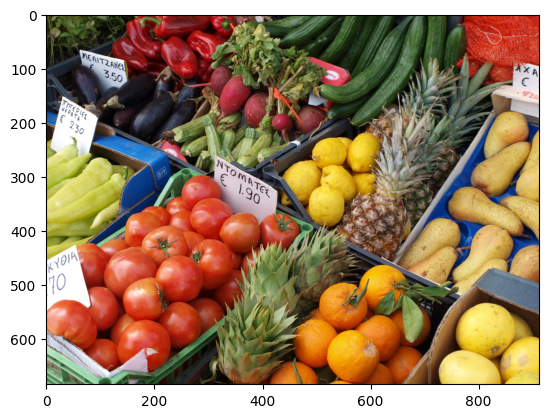

In [27]:
using PyPlot
A = imread("sample_photo.png")
imshow(A);

In [25]:
# Code from first section
using PyPlot
using Statistics
A = imread("sample_photo.png")
function imshow_scale(A)
    # Like imshow(A) but scales the values to [0,1] and supports grayscale
    
    A .-= minimum(A)            # Scale and shift to [0,1]
    A ./= maximum(A)
    if ndims(A) < 3
        A = reshape(A, size(A,1), size(A,2), 1)
    end
    if size(A,3) == 1
        A = repeat(A, 1, 1, 3)  # Set R=G=B for grayscale
    end
    imshow(A)
end

function image_threshold(A, th)
    return Float64.(A .> th)
end;

function image_avgfilter(A)
    B = 0*A
    for i = 2:size(A,1)-1, j = 2:size(A,2)-1
        B[i,j] = mean(A[i-1:i+1, j-1:j+1])
    end
    return B
end
function filter_demo(B, filter_function)
    E = copy(B);
    for i = 0:3
        subplot(2,2,i+1); imshow_scale(E[260:350,300:420,:])
        title("$(i) times average filter")
        E = filter_function(E);
    end
    tight_layout()
end

filter_demo (generic function with 1 method)

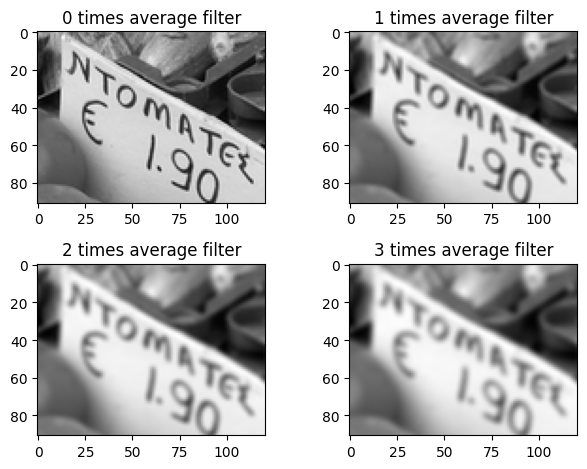

In [47]:
B = mean(A, dims=3)[:,:,1]
#imshow_scale(image_avgfilter(B))
function filter_demo(B, filter_function)
    E = copy(B);
    for i = 0:3
        subplot(2,2,i+1); imshow_scale(E[260:350,300:420,:])
        title("$(i) times average filter")
        E = filter_function(E);
    end
    tight_layout()
end
filter_demo(B, image_avgfilter)

In [52]:
S = [1,2,3,4,5]
popfirst!(S)
popfirst!(S)
popfirst!(S)
S

2-element Vector{Int64}:
 4
 5